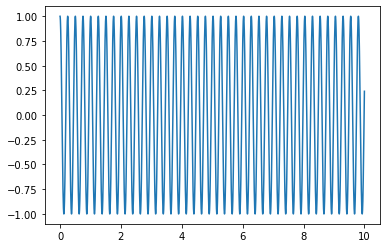

In [139]:
import numpy as np
import matplotlib.pyplot as plt

t = np.linspace(0,10,100000)
sig = np.cos(25*t)
plt.figure()
plt.plot(t,sig)


In [192]:
'''
Attention: might be broken, check the sympy code below
'''

sig = np.cos(25*t)
all_noise = np.zeros_like(sig)
sig_orig = np.copy(sig)

snr_db=-10
snr=10**(snr_db/10)
snr=0.1

p_sig_orig = np.mean(sig**2)
p_sig = np.mean(sig**2)
p_noise = 0
all_p_noise = 0
theor_noise = 1/(1+1/snr)/snr

for i in range(10):
    #p_sig_no_fact = np.mean(sig**2)
    sig_factor_in = np.random.rand()
    sig *= sig_factor_in
    sig_orig *= sig_factor_in
    sig_factor = (np.mean(sig**2))/(p_sig+p_noise)
    print(sig_factor_in, sig_factor)
    
    all_noise *= sig_factor
    all_p_noise *= sig_factor**2
    p_sig_orig *= sig_factor**2
    
    p_sig = np.mean(sig**2)
    p_noise = p_sig/snr
    noise = np.random.normal(0, np.sqrt(p_noise), (sig.shape))
    
    sig += noise
    all_noise += noise
    
    p_noise = np.mean(noise**2)
    all_p_noise += p_noise
    p_all_noise = np.mean(all_noise**2)
    p_all_sig = np.mean(sig_orig**2)
    theor_noise *= (1+1/snr)
    
    print('current snr', 10*np.log10(p_sig/p_noise))
    print('theoretic snr', 10*np.log10(1/theor_noise))
    print('cumulat snr', 10*np.log10((p_sig_orig)/all_p_noise))   
    print('total   snr',10*np.log10(p_all_sig/p_all_noise))
    print(np.mean((sig_orig+all_noise)**2), np.mean(sig**2))
    print('\n')
    
    snr=np.random.rand()

0.23431533903393353 0.05490367810658721
current snr -10.002205441585001
theoretic snr -10.0
cumulat snr -22.60619104482769
total   snr -10.002205441585001
0.30201428729482466 0.30201428729482466


0.41988396631544855 0.17641181825247235
current snr -9.801637647239275
theoretic snr -20.21996022049118
cumulat snr -40.42858118452175
total   snr -20.288760652816876
0.5214835039070637 0.5607158021745436


0.8861333834219628 0.7835329582395203
current snr -0.14894534124726325
theoretic snr -23.300908512347377
cumulat snr -44.29350581560523
total   snr -23.09834700989887
0.778257725182894 0.8982968915395564


0.6430866214578148 0.4146452954302186
current snr -5.275247254694959
theoretic snr -29.719855918641052
cumulat snr -54.470303232263376
total   snr -29.45429712731834
1.3863421959976965 1.622589960113887


0.28147283785636523 0.07919952741456837
current snr -2.320331308350376
theoretic snr -34.0263174991495
cumulat snr -68.66244267464437
total   snr -32.63383303220471
0.22822484799681864 

In [252]:
from sympy import *
ps1, s1, s2, s3, s4, s5, f1, f2, f3, f4, f5 = symbols('p_{s1} snr_1 snr_2 snr_3 snr_4 snr_5 f_1 f_2 f_3 f_4 f_5')
p_sig = ps1
all_noise=0

ps1 = ps1*f1
p_sig*=f1

pn1 = ps1/s1
all_noise += pn1
tot_snr = simplify(ps1/(pn1))
display(simplify(ps1/pn1))
display(tot_snr)
display(simplify(tot_snr - p_sig/all_noise))

ps2 = (pn1+ps1)*f2
pn2 = ps2/s2

p_sig*=f2
all_noise*=f2
all_noise+=pn2
tot_snr = simplify(ps1*f2/(pn1*f2+pn2))

display(simplify(ps2/pn2))
display(tot_snr)
display(simplify(tot_snr - p_sig/all_noise))

ps3 = (pn2+ps2)*f3
pn3 = ps3/s3

p_sig*=f3
all_noise*=f3
all_noise+=pn3

display(simplify(ps3/pn3))
tot_snr = simplify(ps1*f2*f3/(pn1*f2*f3+pn2*f3+pn3))
display(tot_snr)
display(simplify(tot_snr - p_sig/all_noise))

ps4 = (pn3+ps3)*f4
pn4 = ps4/s4

p_sig*=f4
all_noise*=f4
all_noise+=pn4
tot_snr = simplify(ps1*f2*f3*f4/(pn1*f2*f3*f4+pn2*f3*f4+pn3*f4+pn4))
display(simplify(ps4/pn4))
display(tot_snr)
display(simplify(tot_snr - p_sig/all_noise))

ps5 = (pn4+ps4)*f5
pn5 = ps5/s5

p_sig*=f5
all_noise*=f5
all_noise+=pn5
tot_snr = simplify(ps1*f2*f3*f4*f5/(pn1*f2*f3*f4*f5+pn2*f3*f4*f5+pn3*f4*f5+pn4*f5+pn5))

display(simplify(ps5/pn5))
display(tot_snr)
display(simplify(tot_snr - p_sig/all_noise))



snr_1

snr_1

0

snr_2

snr_1*snr_2/(snr_1 + snr_2 + 1)

0

snr_3

snr_1*snr_2*snr_3/(snr_2*snr_3 + snr_3*(snr_1 + 1) + (snr_1 + 1)*(snr_2 + 1))

0

snr_4

snr_1*snr_2*snr_3*snr_4/(snr_2*snr_3*snr_4 + snr_3*snr_4*(snr_1 + 1) + snr_4*(snr_1 + 1)*(snr_2 + 1) + (snr_1 + 1)*(snr_2 + 1)*(snr_3 + 1))

0

snr_5

snr_1*snr_2*snr_3*snr_4*snr_5/(snr_2*snr_3*snr_4*snr_5 + snr_3*snr_4*snr_5*(snr_1 + 1) + snr_4*snr_5*(snr_1 + 1)*(snr_2 + 1) + snr_5*(snr_1 + 1)*(snr_2 + 1)*(snr_3 + 1) + (snr_1 + 1)*(snr_2 + 1)*(snr_3 + 1)*(snr_4 + 1))

0

In [254]:
isinstance(1,(float,int))

True